In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
import seaborn as sns
from IPython.display import HTML, SVG, display
from graphviz import Source

In [4]:
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

In [5]:
titanic_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/titanic.csv")

In [6]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Проверим, есть ли не заполненные значения
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X = titanic_df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_df.Survived

In [9]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [10]:
# Преобразовываем данные для удобства работы с ними

# Параметр sex состоит из значений male и female, проеобразуем его в числовые значения,
# разбив на две колоки: sex_male, sex_semale. Аналогично для параметра Embarked
X = pd.get_dummies(X)

# Пропущенные значения для параметра Age заполним медиаными значениями
X = X.fillna({"Age": X.Age.median()})

# Убедимся, что не остплось не заполненных значений
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [12]:
# Создадим и обучим дерево решений на полученных данных
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

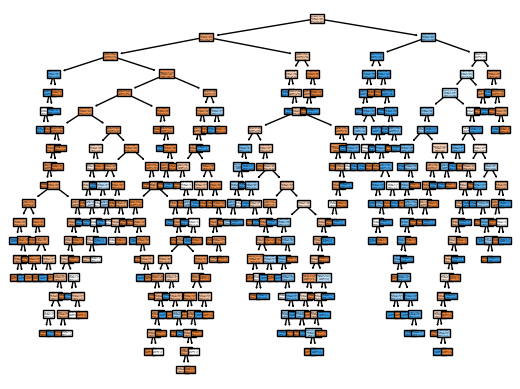

In [13]:
# Построим полученное дерево решений
plot_tree(clf, feature_names=list(X), class_names=["Died", "Survived"], filled=True);

In [14]:
# Вывод
# По построенному дереву видно, что мы столкнулись с проблемой переобучения модели
# Получилось очень большое и сложное дерево, которое пытается идеально подстроиться под все данные
# При этом такая усложнённая можель может не подойти для аналогичной выборки с похожии данными
# Главная задача - обучить модель так, чтобы она нашла общие закономерности, имея ограниченный ресурс

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=45)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((294, 10), (597, 10), (294,), (597,))

In [17]:
# Проверим точность предсказаний модели для выборки до преобразований
clf.score(X, y)

0.9797979797979798

In [18]:
# Переобучим модель на обучающем множестве значений и проверим точность предсказаний модели для выборки после преобразований
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9863945578231292

In [19]:
# Проверим точность предсказаний модели для можества тестовых значений, которых класификатор не видел
clf.score(X_test, y_test)

0.7236180904522613

In [20]:
# Переобучим дерево, ограничив его ресурсы для обучения, задав максимальную глубину
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
# Проверим точность переообученной модели на обучающих данных
clf.score(X_train, y_train)

0.8299319727891157

In [22]:
# Проверим точность переообученной модели на тестовых данных
clf.score(X_test, y_test)

0.8190954773869347

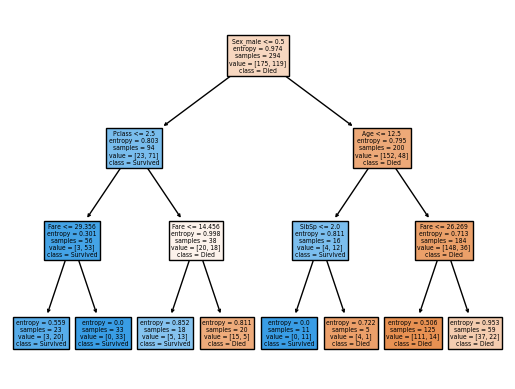

In [23]:
# Построим новое дерево решений для переобученной модели
plot_tree(clf, feature_names=list(X), class_names=["Died", "Survived"], filled=True);

In [24]:
# Вывод
# Видим, что снизилась точность предсказания для обучающих данных, но при этом повысилась точность для тестовых данных
# При этом упростилось и само дерево решений при этом не сильно потеряв в точности

In [25]:
# 2.4

In [26]:
# Проведем эксперимент и попробуем обучить наше дерево с разной максимальной глубиной дерева
# Зададим диапазон максимальных значений глубины дерева: от 1 до 100

# Заведем пустой датафрейм, в который будем сохранять полученные значения
scores_df = pd.DataFrame()

for depth in range(1, 100):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    score_data = pd.DataFrame(
        {
            "max_depth": [depth],
            "train_score": train_score,
            "test_score": test_score,
            "cross_val_score": [mean_cross_val_score],
        }
    )

    scores_df = pd.concat([scores_df, score_data])

In [27]:
scores_df.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.758503,0.800670,0.758504
0,2,0.792517,0.792295,0.775511
0,3,0.829932,0.819095,0.796084
0,4,0.846939,0.804020,0.755348
0,5,0.850340,0.809045,0.765576


In [28]:
# Переформатируем полученный датафрейм в long формат
scores_df_long = pd.melt(
    scores_df,
    id_vars=["max_depth"],
    value_vars=["train_score", "test_score", "cross_val_score"],
    var_name="set_type",
    value_name="score",
)

In [29]:
scores_df_long.head()

,max_depth,set_type,score
0,1,train_score,0.758503
1,2,train_score,0.792517
2,3,train_score,0.829932
3,4,train_score,0.846939
4,5,train_score,0.850340


In [30]:
scores_df_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.758504
199,2,cross_val_score,0.775511
200,3,cross_val_score,0.796084
201,4,cross_val_score,0.755348
202,5,cross_val_score,0.765576
203,6,cross_val_score,0.768849
204,7,cross_val_score,0.741788
205,8,cross_val_score,0.758738
206,9,cross_val_score,0.755289
207,10,cross_val_score,0.738340


/Users/narek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/narek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='max_depth', ylabel='score'>

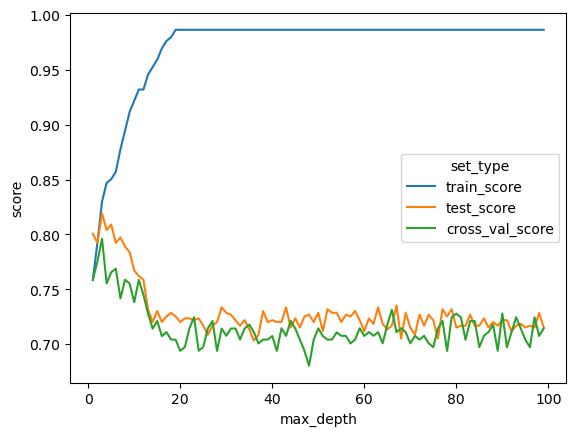

In [31]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_df_long)

In [32]:
# Для улучшения обучения модели используем кроссвалидацию: cross_val_score

In [33]:
best_clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [34]:
# Результаты обучения при кроссвалидации (среднее значение точности)
cross_val_score(best_clf, X_train, y_train, cv=5).mean()

0.7485096434833431

In [35]:
# Задание 1
# Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100.
# Целевой переменной при обучении является переменная species.
# При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных,
# и аккуратность предсказаний (accuracy_score) на тестовом датасэте.
# Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева.
# Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)
# np.random.seed(0)
# my_awesome_tree = DecisionTreeClassifier(...)
# или
# my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [36]:
iris_train_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
iris_train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [37]:
iris_test_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)
iris_test_data.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [38]:
X_train = iris_train_data.drop("species", axis=1)
y_train = iris_train_data["species"]
X_test = iris_test_data.drop("species", axis=1)
y_test = iris_test_data["species"]

In [39]:
scores_data = pd.DataFrame()
rs = np.random.seed(0)

for depth in range(1, 101):
    clf = DecisionTreeClassifier(criterion="entropy", random_state=rs, max_depth=depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    score_data = pd.DataFrame(
        {
            "max_depth": [depth],
            "train_score": train_score,
            "test_score": test_score,
        }
    )

    scores_data = pd.concat([scores_data, score_data])

In [40]:
# Переформатируем полученный датафрейм в long формат
scores_data_long = pd.melt(
    scores_data,
    id_vars=["max_depth"],
    value_vars=["train_score", "test_score"],
    var_name="set_type",
    value_name="score",
)

In [41]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


/Users/narek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/narek/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='max_depth', ylabel='score'>

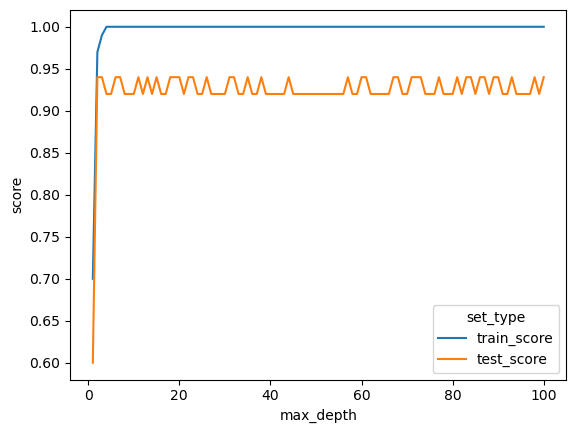

In [42]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [43]:
# Задание 2
# Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать!
# Скачайте тренировочный датасэт и  обучите на нём Decision Tree.
# После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся.
# Введите число собачек в вашем датасэте.
# В задании допускается определённая погрешность.
# P.S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [44]:
# train_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")
train_data_path = "files/dogs_n_cats_train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [45]:
test_data_path = "files/dogs_n_cats_test.json"
test_data = pd.read_json(test_data_path)
test_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,29,34.8,1,0,0
1,31,37.2,1,1,0
2,31,37.2,1,1,0
3,15,18.0,1,1,0
4,19,22.8,1,1,0


In [46]:
# Подготовка данных для обучения
X_train = train_data.drop("Вид", axis=1)
y_train = train_data["Вид"]

In [47]:
# Обучение дерева решений
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [48]:
# Предсказание на тестовых данных
predictions = clf.predict(test_data)

In [49]:
# Подсчёт количества собачек в предсказаниях
number_of_dogs = (predictions == "собачка").sum()
number_of_dogs

40